In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

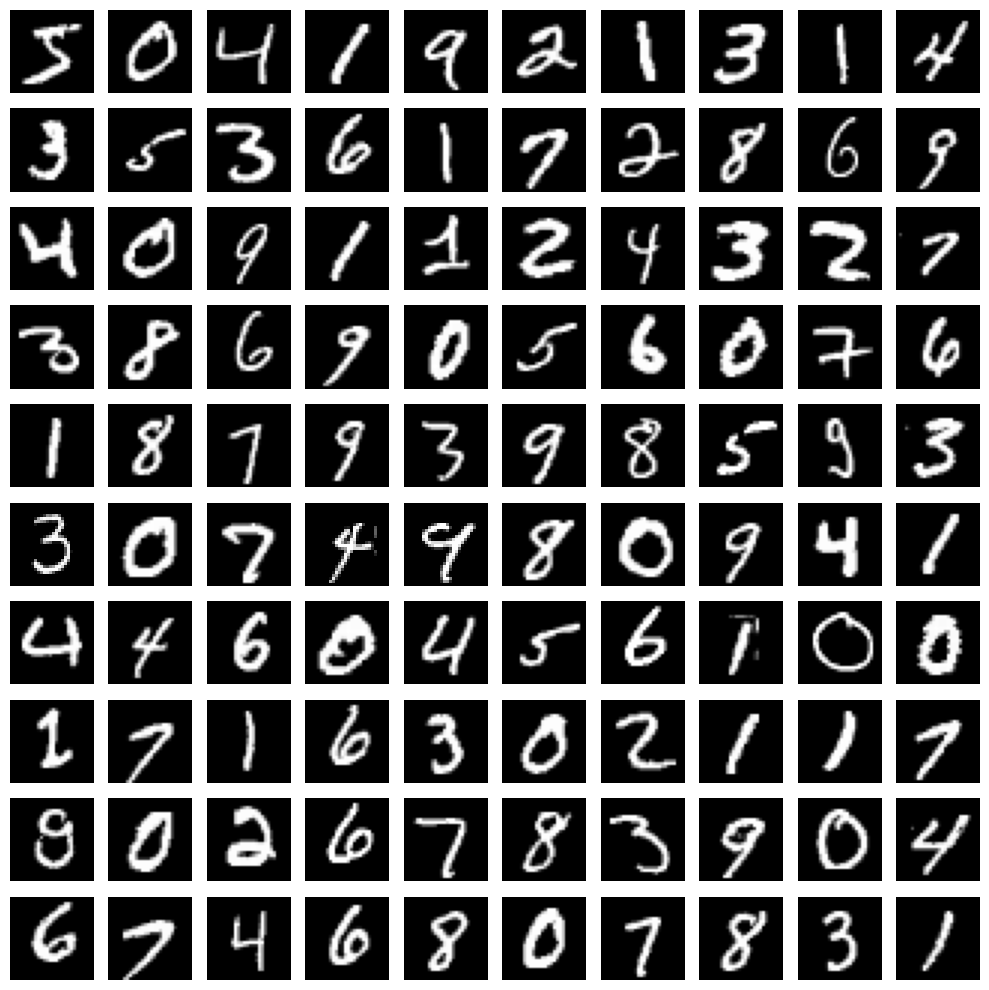

In [13]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for i in range(100):
  plt.sca(axs[i // 10, i % 10])
  axs[i // 10, i % 10].axis('off')
  plt.imshow(X[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
  
fig.tight_layout()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KeyboardInterrupt: 

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.969


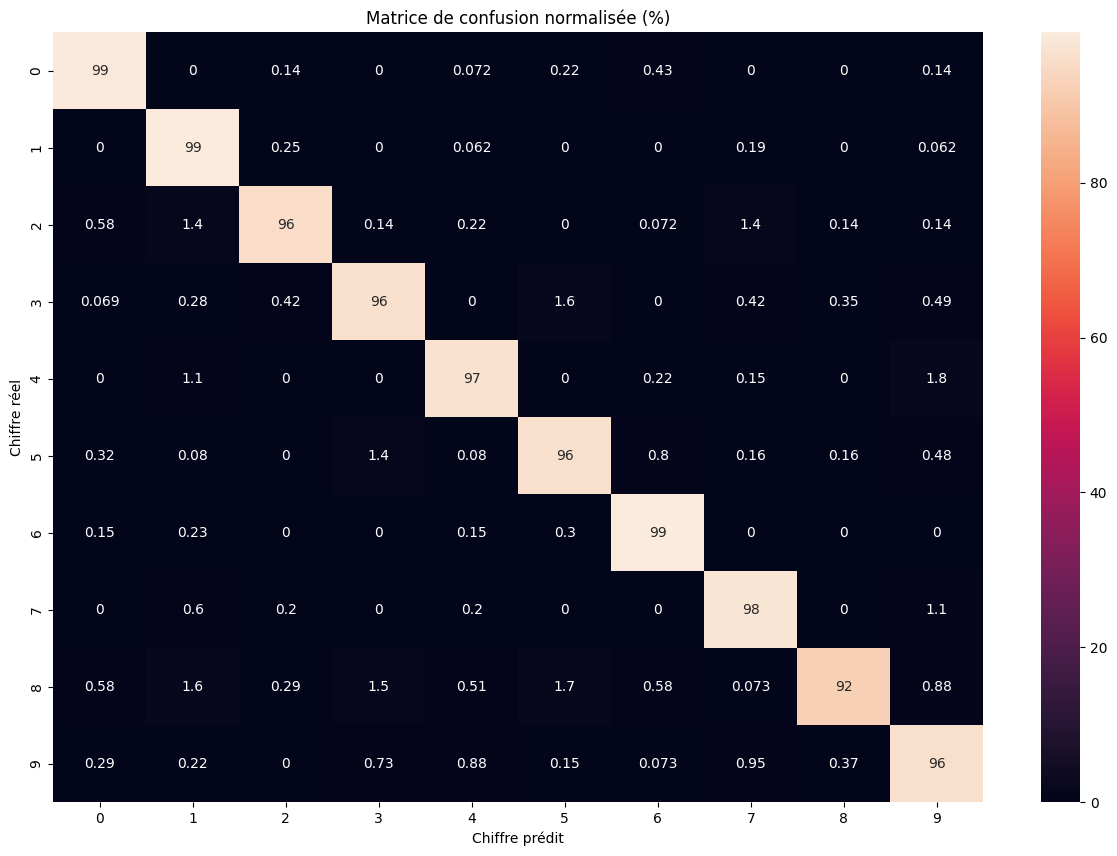

,Chiffre,Exactitude (%)
0,0,98.995696
1,1,99.439950
2,2,95.890411
3,3,96.388889
4,4,96.733482
5,5,96.485623
6,6,99.174174
7,7,97.872340
8,8,92.341357
9,9,96.339678


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns
import pandas as pd

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') * 100 / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15, 10))
sns.heatmap(cm_normalized,  annot=True, cmap='rocket')
plt.xlabel("Chiffre prédit")
plt.ylabel("Chiffre réel")
plt.title("Matrice de confusion normalisée (%)")
plt.show()

per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
pd.DataFrame([[i, acc * 100] for i, acc in enumerate(per_class_accuracy)], columns=['Chiffre', 'Exactitude (%)'])